## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

## Read Data

In [2]:
data = pd.read_csv('C:/Users/Reskur/Documents/excel/Sales.csv')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Sort Data by Oldest Date

In [3]:
import numpy as np

In [4]:
data = data.sort_values(['Date'], ascending=True).reset_index()
data.head()

,index,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,60993,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
1,58729,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
2,58913,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
3,63711,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
4,49787,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813


## Check Data Type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             113036 non-null  int64 
 1   Date              113036 non-null  object
 2   Day               113036 non-null  int64 
 3   Month             113036 non-null  object
 4   Year              113036 non-null  int64 
 5   Customer_Age      113036 non-null  int64 
 6   Age_Group         113036 non-null  object
 7   Customer_Gender   113036 non-null  object
 8   Country           113036 non-null  object
 9   State             113036 non-null  object
 10  Product_Category  113036 non-null  object
 11  Sub_Category      113036 non-null  object
 12  Product           113036 non-null  object
 13  Order_Quantity    113036 non-null  int64 
 14  Unit_Cost         113036 non-null  int64 
 15  Unit_Price        113036 non-null  int64 
 16  Profit            113036 non-null  int

## Change Data Type Date from object to datetime64

In [6]:
data = data.astype({'Date':'datetime64'})

## Check Missing Value

In [7]:
data.isnull().sum()

index               0
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

There are no missing values 

## Check Duplicate Value

In [8]:
dups = data.duplicated()
print(dups.any)
print(data[dups])

<bound method NDFrame._add_numeric_operations.<locals>.any of 0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool>
Empty DataFrame
Columns: [index, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []


There are no duplicated value

## EDA on Numerical Feature

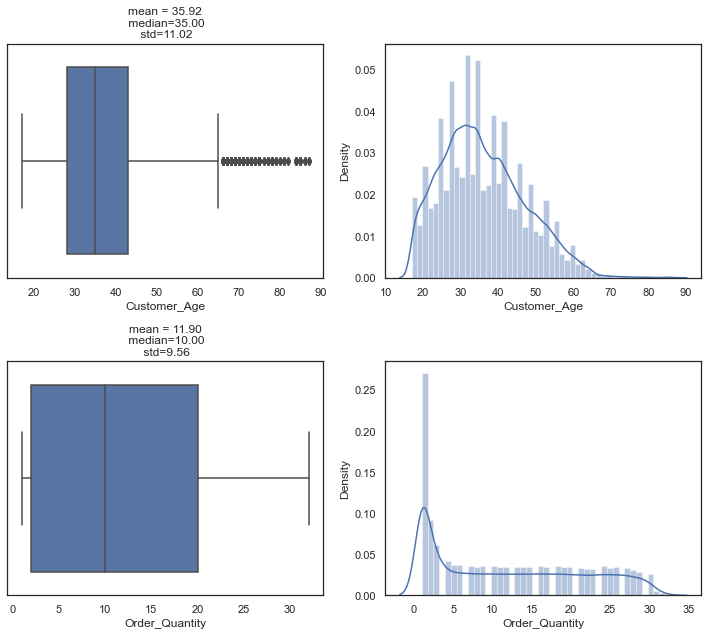

In [36]:
sns.set(style='white')
kolom_numerik=cust_segment[['Customer_Age', 'Order_Quantity']]
fig, axs = plt.subplots(2,2, figsize=(10,9))
for i, kol in enumerate(kolom_numerik):
    sns.boxplot(cust_segment[kol], ax=axs[i][0])
    sns.distplot(cust_segment[kol], ax=axs[i][1])
    axs[i][0].set_title('mean = %.2f\n median=%.2f\n std=%.2f'%(cust_segment[kol].mean(),
                                                               cust_segment[kol].median(),
                                                                cust_segment[kol].std()))
plt.tight_layout()
plt.show()

The graph shows that the average age of customers is 35 years and the most orders are under 5 products

## EDA on Categorical Feature

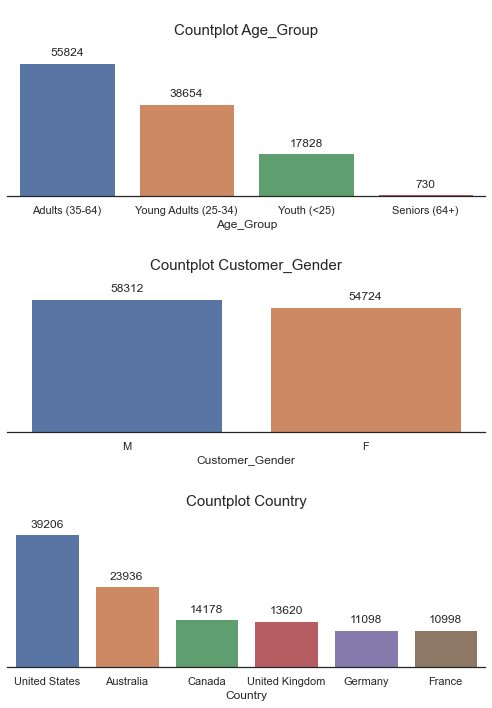

In [37]:
kolom_kategorikal = ['Age_Group', 'Customer_Gender', 'Country']
fig, axs = plt.subplots(3,1, figsize=(7,10))
for i, kol in enumerate(kolom_kategorikal):
    sns.countplot(cust_segment[kol], order=cust_segment[kol].value_counts().index, ax=axs[i])
    axs[i].set_title('\nCountplot %s\n'%(kol), fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width()/2, p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0,10),
                       textcoords = 'offset points')
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    plt.tight_layout();
plt.show()

In the graph above, it can be seen that there are many customers in the adult category 49%, then male customers 51% and 48% women there is only a slight difference, and those who live in the United States 34%

## Which Country Contributes The Biggest Profit?

In [9]:
profit_country = data.groupby(['Country'])['Profit'].sum().sort_values(ascending=False)
profit_country.head

<bound method NDFrame.head of Country
United States     11073644
Australia          6776030
United Kingdom     4413853
Canada             3717296
Germany            3359995
France             2880282
Name: Profit, dtype: int64>

## When does data start to be recorded?

In [10]:
data['Date'].describe()

C:\Users\Reskur\AppData\Local\Temp\ipykernel_7104\3734259392.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Date'].describe()


count                  113036
unique                   1884
top       2016-03-01 00:00:00
freq                      288
first     2011-01-01 00:00:00
last      2016-07-31 00:00:00
Name: Date, dtype: object

## Profit Trend By Year By Country

In [11]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [12]:
data2 = data[['year', 'Country', 'Profit']].groupby(['year', 'Country'], as_index=False).sum()
data2.head(25)

,year,Country,Profit
0,2011,Australia,710466
1,2011,Canada,303494
2,2011,France,277373
3,2011,Germany,270488
4,2011,United Kingdom,303817
5,2011,United States,1015663
6,2012,Australia,716091
7,2012,Canada,319965
8,2012,France,279851
9,2012,Germany,271280


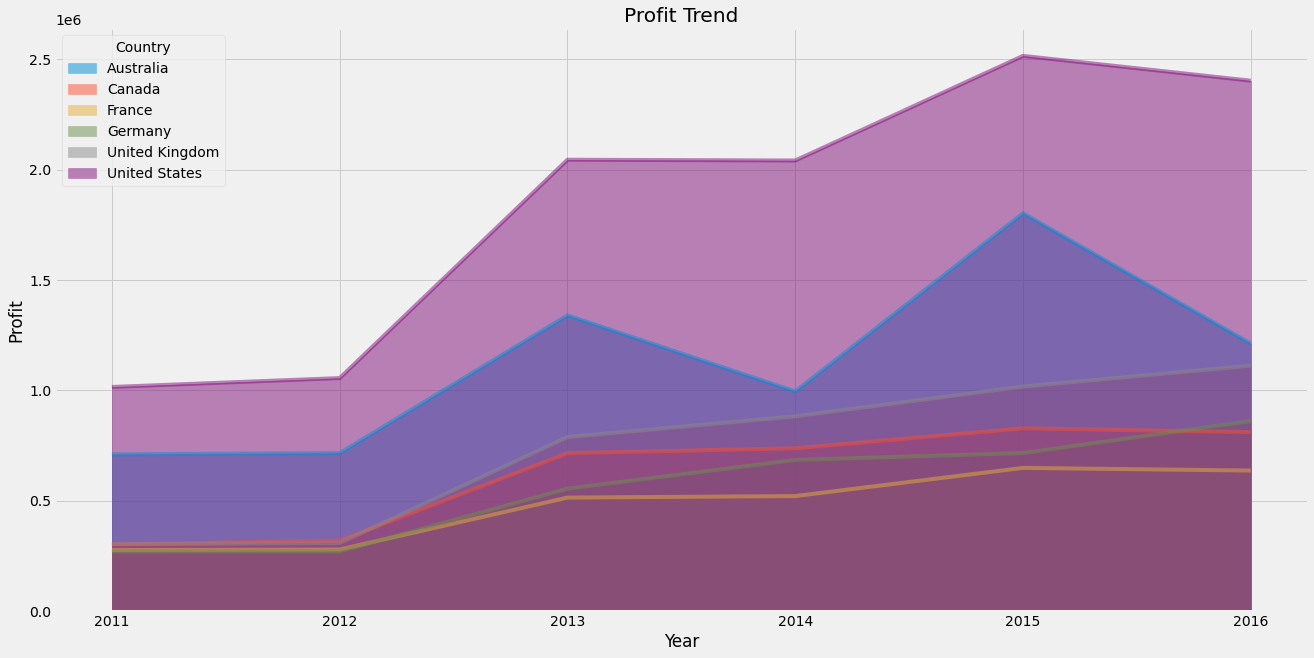

In [13]:
data2 = data2.pivot(index='year', columns='Country', values='Profit')
data2.index = data2.index.map(int) 
data2.plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Profit Trend')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.show()

In the profit graph above, we can see exciting things on the chart for Australia, and we can see a decrease in profits from 2013 to 2014 and a high increase in 2015. For that, we will analyze further to see what happened that year.

## Australia Profit Trend Analysis

In [14]:
data_australia = data[(data['Country'] == 'Australia') & (data['Year']==2014)]
data_australia['Year'].unique()

array([2014], dtype=int64)

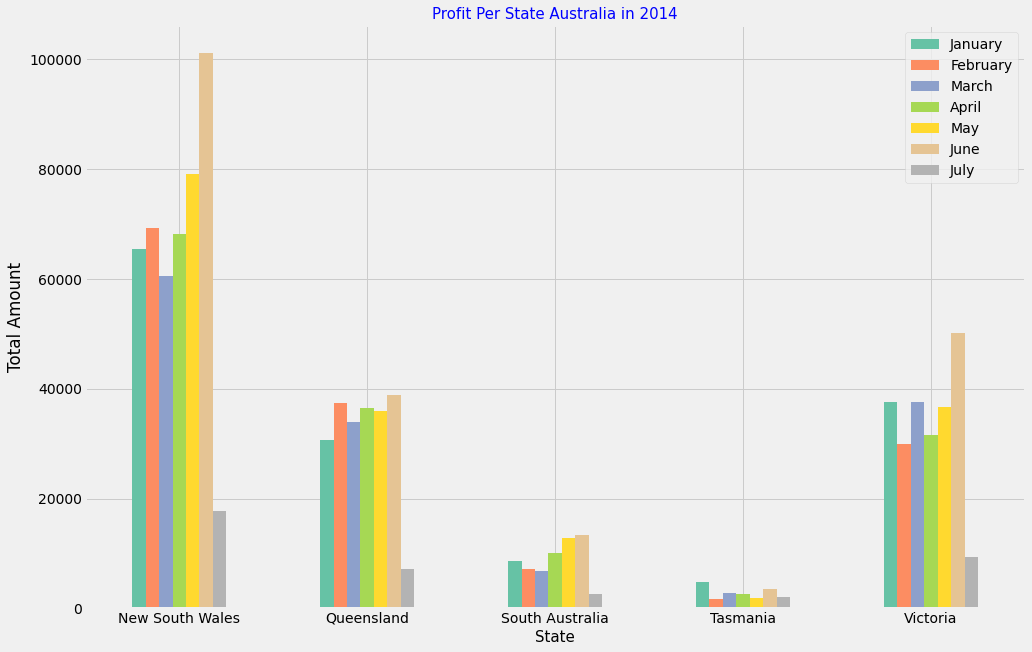

In [15]:
data_australia.groupby(['State', 'month'])['Profit'].sum().unstack().plot(kind='bar', cmap = 'Set2', figsize=(15,10))
plt.title('Profit Per State Australia in 2014', fontsize=15, color='blue')
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July'])
plt.show()

In [16]:
data_per_customer = (data_australia.groupby('Age_Group').agg({'Order_Quantity':'sum', 'Profit':'sum'}).reset_index())
data_per_customer.sort_values(['Profit'], ascending=False).head()

,Age_Group,Order_Quantity,Profit
0,Adults (35-64),33867,567885
2,Young Adults (25-34),27589,301484
3,Youth (<25),11134,124116
1,Seniors (64+),81,1988


In [17]:
data_australia_2013 = data[(data['Country'] == 'Australia') & (data['Year'] == 2013)]
data_cust_year_2013 = (data_australia_2013.groupby('Age_Group').agg({'Order_Quantity':'sum', 'Profit':'sum'}).reset_index())
data_cust_year_2013.sort_values(['Profit'], ascending=False).head()

,Age_Group,Order_Quantity,Profit
2,Young Adults (25-34),24147,543605
0,Adults (35-64),22559,506677
3,Youth (<25),11694,285869
1,Seniors (64+),223,3669


The decline in profit in 2014 was due to record sales data only reaching July, causing a 25% decrease in profit from 1,339,820 in 2013 to only 993,485 in 2014. This is inversely proportional to the record order, where there was an increase in orders of 23 % in 2014, even though the record only reached July

## Correlation Between Customer Age and Profit

<AxesSubplot:xlabel='Customer_Age', ylabel='Profit'>

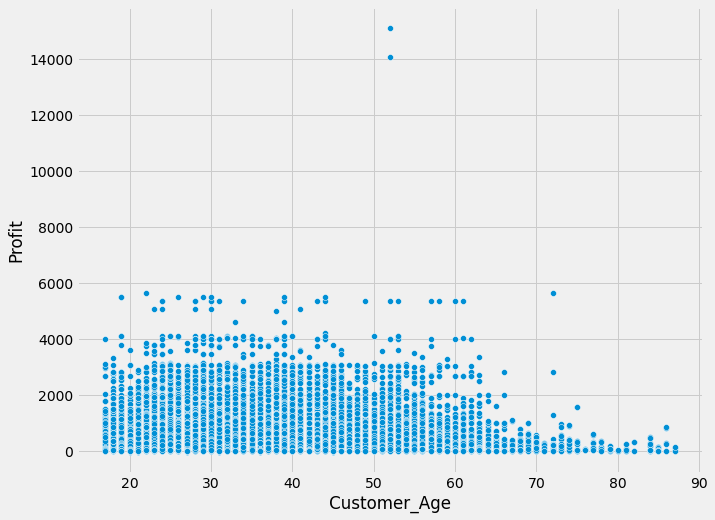

In [18]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Customer_Age', y='Profit')

We can see the correlation between customer age and profit on the scatter plot, where the older the customer, the less profit generated

## Correlation Between Order Quantity and Profit

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

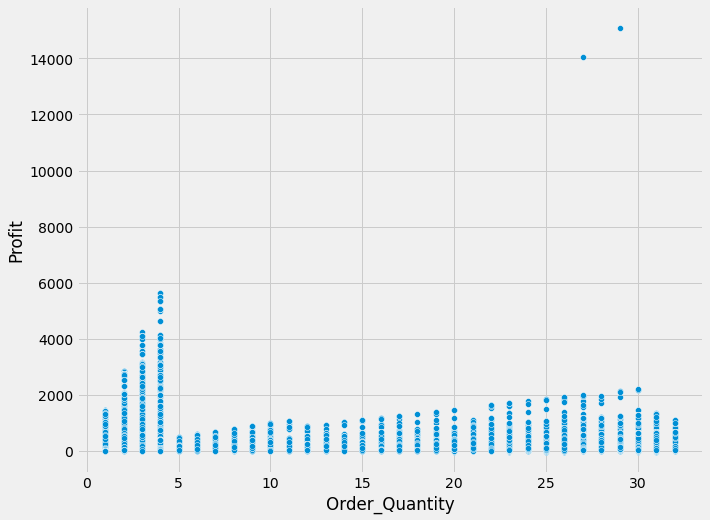

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Order_Quantity', y='Profit')

we can see the correlation between order quantity and profit on the scatter plot, where it can be seen that orders under five products generate greater profits, this could be due to the sale of products whose unit prices are quite expensive

## Top FIve Product Based On Order Quantity

In [20]:
top_product5_15 = (data[data['year']==2015].groupby('Sub_Category')['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity',
                                                                                                                 ascending=False).head(5))
top_product5_15

,Sub_Category,Order_Quantity
14,Tires and Tubes,110155
2,Bottles and Cages,49350
7,Helmets,39498
9,Jerseys,19909
3,Caps,13916


## The Top Five Products Of The Best Year

From the previous profit trend chart above, we can see that 2015 was the best year, generating maximum profits compared to the earlier years. Therefore we have to analyze which products can sell optimally and generate profits in 2015

In [21]:
dataset_top_product = data[(data['year'] == 2015) & (data['Sub_Category'].isin(top_product5_15['Sub_Category'].to_list()))]
dataset_top_product

,index,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,...,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,year,month
60933,5849,2015-07-01,1,July,2015,19,Youth (<25),F,Germany,Nordrhein-Westfalen,...,Bottles and Cages,Water Bottle - 30 oz.,10,2,5,24,20,44,2015,7
60935,45429,2015-07-01,1,July,2015,19,Youth (<25),F,Germany,Nordrhein-Westfalen,...,Jerseys,"Long-Sleeve Logo Jersey, M",6,38,50,33,228,261,2015,7
60936,93749,2015-07-01,1,July,2015,30,Young Adults (25-34),M,United States,California,...,Tires and Tubes,ML Road Tire,7,9,25,109,63,172,2015,7
60937,75062,2015-07-01,1,July,2015,33,Young Adults (25-34),F,United States,Washington,...,Tires and Tubes,Patch Kit/8 Patches,21,1,2,12,21,33,2015,7
60938,77692,2015-07-01,1,July,2015,42,Adults (35-64),F,France,Seine Saint Denis,...,Tires and Tubes,Patch Kit/8 Patches,20,1,2,13,20,33,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83633,4078,2015-12-31,31,December,2015,40,Adults (35-64),F,France,Essonne,...,Bottles and Cages,Water Bottle - 30 oz.,4,2,5,11,8,19,2015,12
83634,2373,2015-12-31,31,December,2015,22,Youth (<25),F,United Kingdom,England,...,Bottles and Cages,Water Bottle - 30 oz.,24,2,5,67,48,115,2015,12
83635,32333,2015-12-31,31,December,2015,45,Adults (35-64),M,France,Essonne,...,Helmets,"Sport-100 Helmet, Red",23,13,35,474,299,773,2015,12
83636,8961,2015-12-31,31,December,2015,54,Adults (35-64),M,France,Charente-Maritime,...,Bottles and Cages,Road Bottle Cage,17,3,9,99,51,150,2015,12


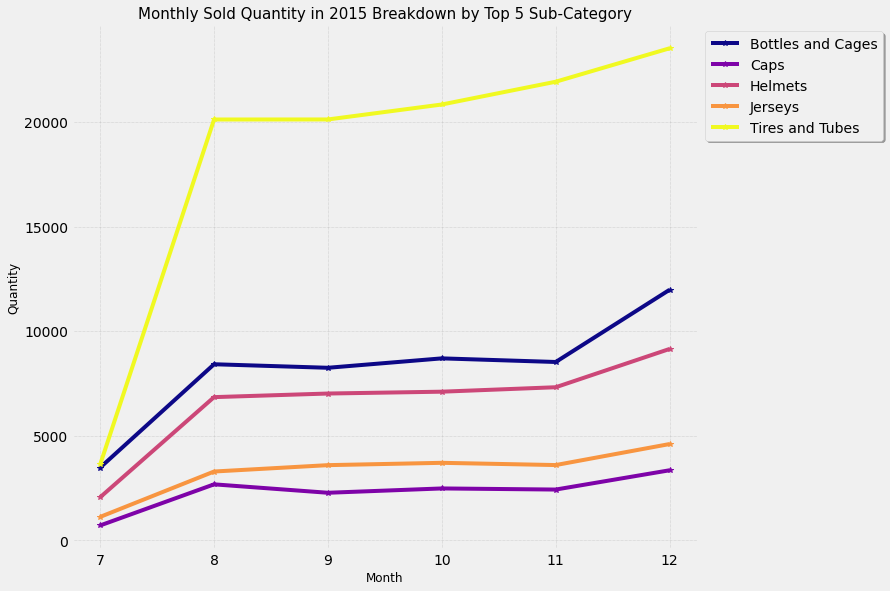

In [22]:
dataset_top_product.groupby(['month', 'Sub_Category'])['Order_Quantity'].sum().unstack().plot(marker='*', cmap='plasma', 
                                                                                             figsize=(10,9))
plt.title('Monthly Sold Quantity in 2015 Breakdown by Top 5 Sub-Category', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), shadow=True)

## Forecasting Profit For The Next 12 Months

In [23]:
data_forecast = data[['Date', 'Profit']]
data_forecast.head()

,Date,Profit
0,2011-01-01,185
1,2011-01-01,1097
2,2011-01-01,900
3,2011-01-01,482
4,2011-01-01,561


In [24]:
data_fix = data_forecast.set_index('Date').resample('M')['Profit'].sum().reset_index()
data_fix.head()

,Date,Profit
0,2011-01-31,212849
1,2011-02-28,207144
2,2011-03-31,226404
3,2011-04-30,223601
4,2011-05-31,234689


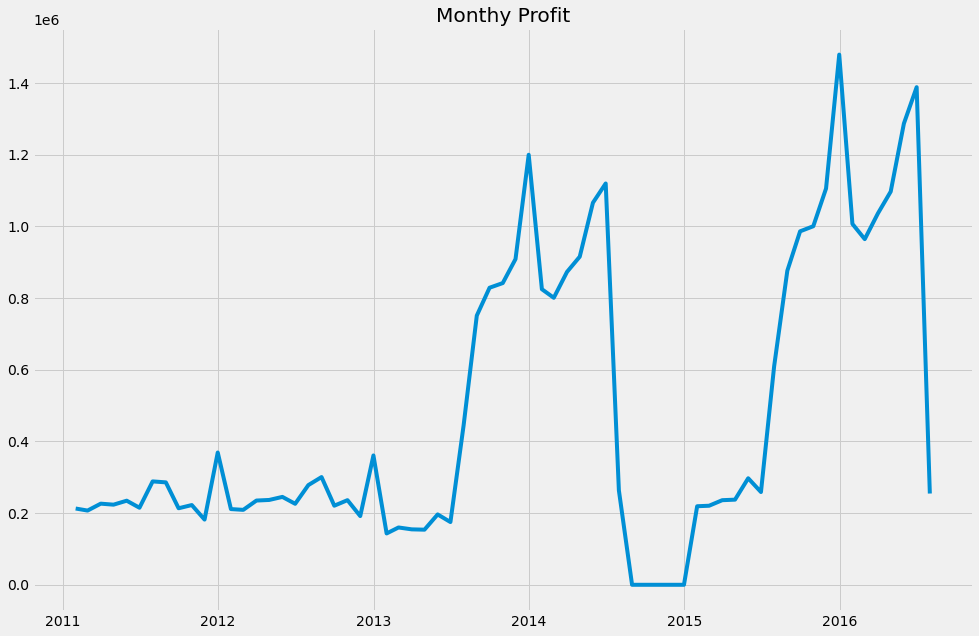

In [25]:
plt.figure(figsize=(15,10))
plt.plot(data_fix['Date'], data_fix['Profit'])
plt.title('Monthy Profit')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_fix['Profit'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.363651
p-value: 0.152260
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


<Figure size 432x288 with 0 Axes>

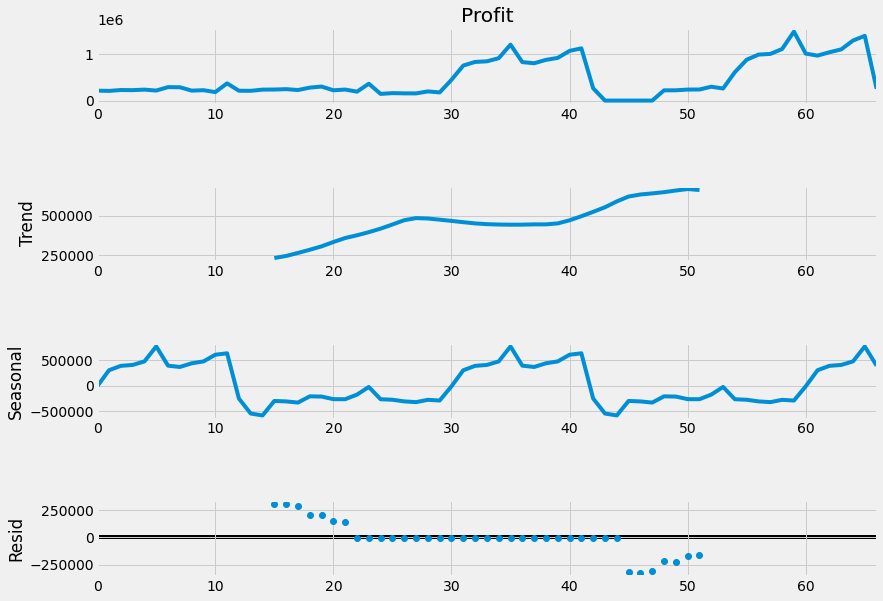

In [27]:
result = seasonal_decompose(data_fix['Profit'], model='additive', period=30)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(15,10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

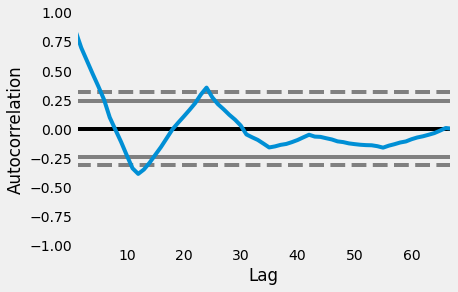

In [28]:
pd.plotting.autocorrelation_plot(data_fix['Profit'])

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


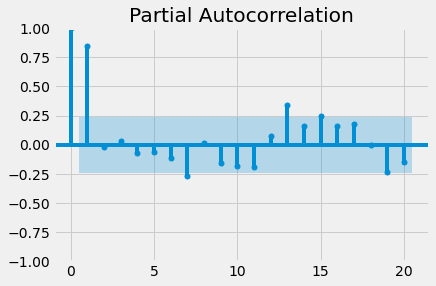

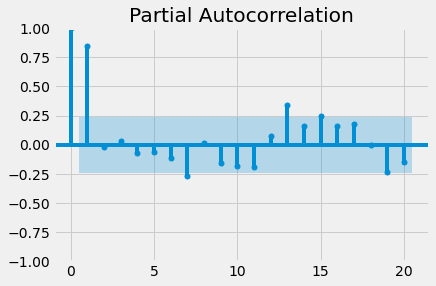

In [29]:
plot_pacf(data_fix['Profit'], lags=20)

In [30]:
p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(data_fix['Profit'], order=(p,d,q), seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Profit   No. Observations:                   67
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -749.155
Date:                            Mon, 28 Nov 2022   AIC                           1528.310
Time:                                    09:25:04   BIC                           1558.145
Sample:                                         0   HQIC                          1539.816
                                             - 67                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1132      0.270      0.418      0.676      -0.417       0.643
ar.L2          0.5715      1.343   

In [31]:
predictions = model.predict(len(data_fix), len(data_fix)+12)
print(predictions)

67    -16385.373721
68      7817.533136
69     19186.410823
70     35506.264897
71     39372.331386
72    282092.940139
73    291762.320505
74    313655.204274
75    316846.429922
76    376241.231923
77    334974.795845
78    713515.764286
79    981305.438500
Name: predicted_mean, dtype: float64


<AxesSubplot:>

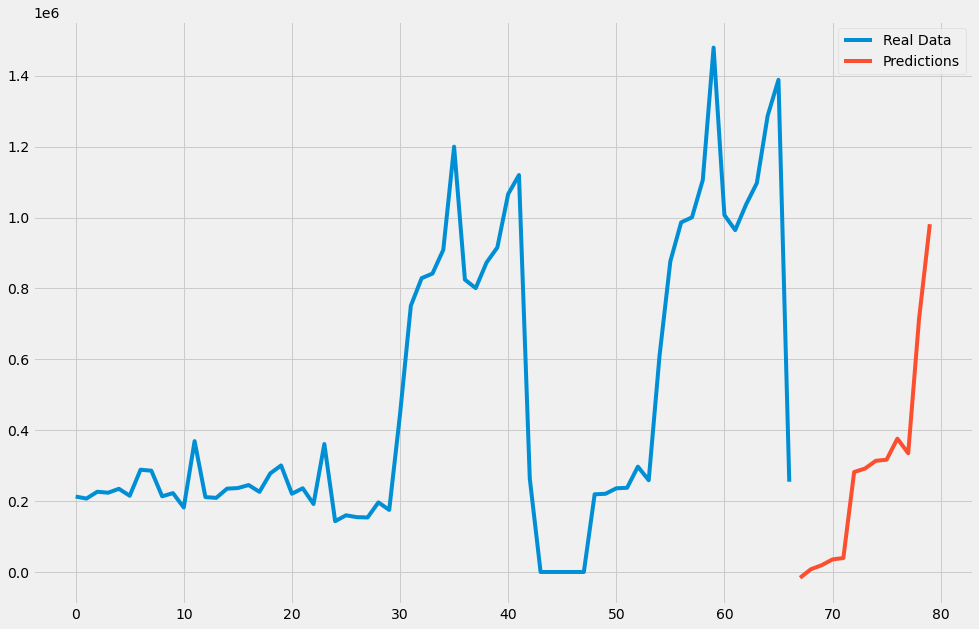

In [32]:
data_fix['Profit'].plot(legend=True, label='Real Data', figsize=(15,10))
predictions.plot(legend=True, label='Predictions')

From the results of the forecasting model, it can be seen that there will be a sharp increase in profit in the next 12 months.